In [5]:

import pandas as pd
from scipy.io import arff
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import sys
!{sys.executable} -m pip install liac-arff

In [7]:
import arff
import pandas as pd

with open(r"C:\Users\param\Downloads\depression_dataset.arff", 'r') as f:
    dataset = arff.load(f)


df = pd.DataFrame(dataset['data'])
df.columns = [attr[0] for attr in dataset['attributes']]

print(df.head())


     id  Gender   Age           City Profession  Academic Pressure  \
0   2.0    Male  33.0  Visakhapatnam    Student                5.0   
1   8.0  Female  24.0      Bangalore    Student                2.0   
2  26.0    Male  31.0       Srinagar    Student                3.0   
3  30.0  Female  28.0       Varanasi    Student                3.0   
4  32.0  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3 

In [8]:

print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [9]:

X = df.drop('Depression', axis=1)
y = df['Depression']

In [10]:
X = X.drop('id', axis=1)

In [11]:

categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [12]:

numerical_cols = X_encoded.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

In [13]:
print("\nShape after encoding and scaling:", X_encoded.shape)


Shape after encoding and scaling: (27901, 109)


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X_encoded)

X_imputed = pd.DataFrame(X_imputed, columns=X_encoded.columns)

selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_imputed, y)

selected_features = X_encoded.columns[selector.get_support()]
print("\nSelected top 10 features:")
print(selected_features)



Selected top 10 features:
Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Dietary Habits_Unhealthy', 'Degree_Class 12',
       'Degree_MA', 'Degree_MBBS',
       'Have you ever had suicidal thoughts ?_Yes'],
      dtype='object')


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

imputer = SimpleImputer(strategy="most_frequent")  # or "mean" if numeric only
X_imputed = imputer.fit_transform(X_encoded)

X_imputed = pd.DataFrame(X_imputed, columns=X_encoded.columns)

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_imputed)

print("\nNumber of PCA components:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)



Number of PCA components: 44
Explained variance ratio: [0.15337976 0.11788899 0.09147589 0.08636841 0.08208539 0.07718677
 0.07141016 0.03110255 0.02429711 0.02171275 0.02089135 0.02034429
 0.01975145 0.01704599 0.00903701 0.00845305 0.00559585 0.00495239
 0.00473813 0.00460572 0.00430163 0.00419533 0.004067   0.00388517
 0.00366139 0.00353287 0.00349867 0.00348471 0.00338811 0.00334024
 0.00330266 0.003253   0.00318786 0.00316997 0.00304316 0.00300248
 0.00295256 0.00293178 0.00287607 0.00275763 0.00273499 0.00260681
 0.00258019 0.0025319 ]


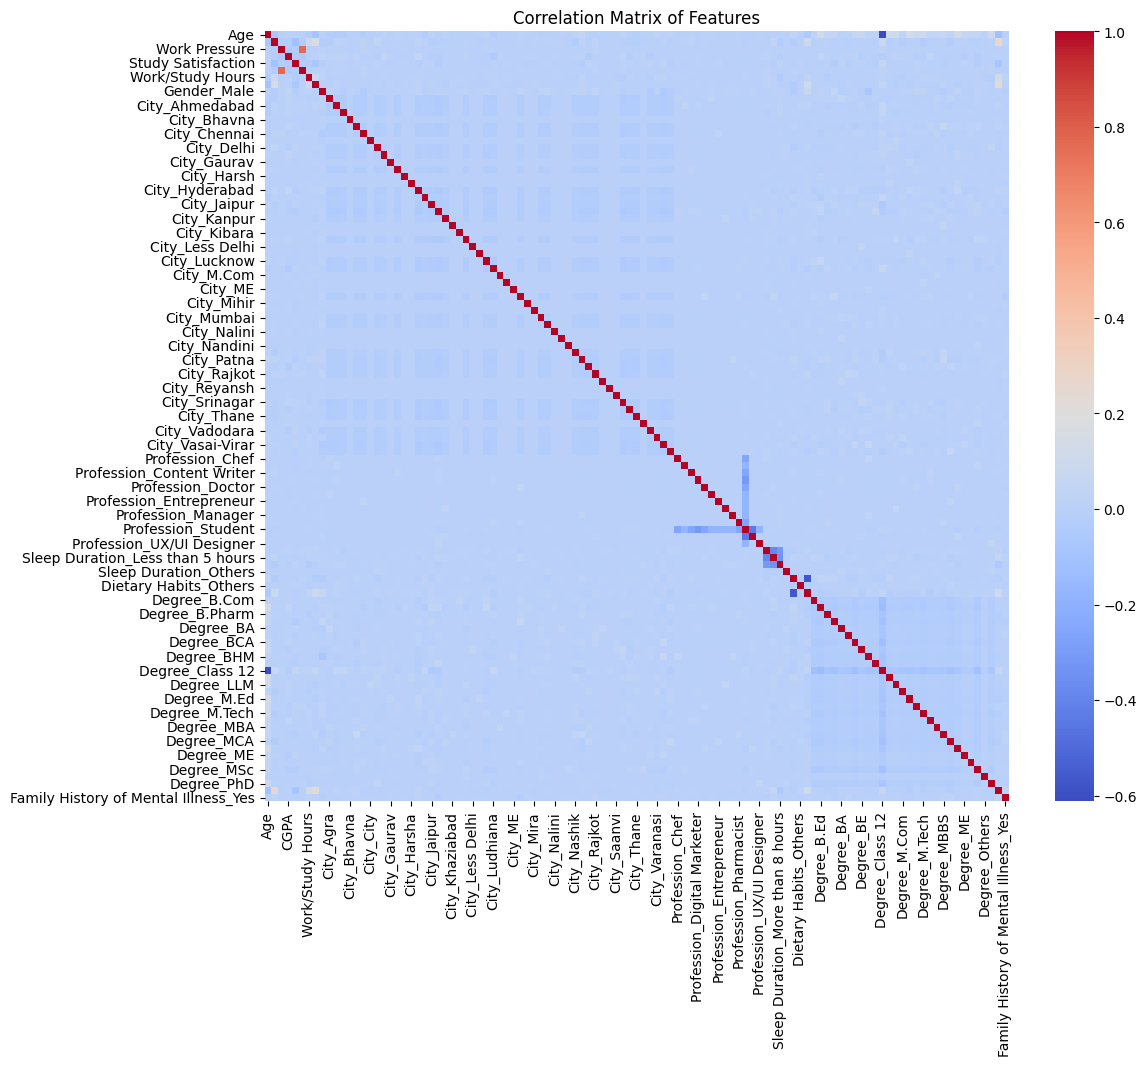

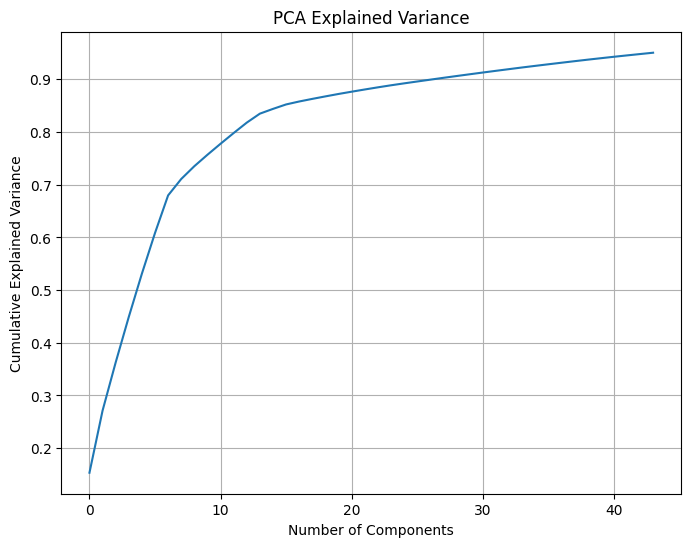

In [16]:

plt.figure(figsize=(12, 10))
corr_matrix = X_encoded.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()




In [17]:

pd.DataFrame(X_selected, columns=selected_features).to_csv('selected_features.csv', index=False)
pd.DataFrame(X_pca).to_csv('pca_features.csv', index=False)
print("\nProcessed features saved as 'selected_features.csv' and 'pca_features.csv' for integration.")


Processed features saved as 'selected_features.csv' and 'pca_features.csv' for integration.


In [18]:
!pip install openpyxl

In [21]:
df.to_csv("results/original_data.csv", index=False)


In [22]:
import pandas as pd
test = pd.read_csv("results/original_data.csv")
test.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2.0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
1,8.0,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0
2,26.0,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0.0
3,30.0,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1.0
4,32.0,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0.0


In [27]:
df.to_excel("results/original_data.xlsx", index=False)


In [28]:
df.to_csv("depression_dataset_clean.csv", index=False)
df.to_excel("depression_dataset_clean.xlsx", index=False)

print("Dataset saved in clear format (CSV & Excel).")


Dataset saved in clear format (CSV & Excel).


In [30]:
import pandas as pd

df_selected = pd.read_csv('selected_features.csv')
print("--- Selected Features (Top 10) ---")
print(df_selected.head())
print(df_selected.shape)

df_pca = pd.read_csv('pca_features.csv')
print("\n--- PCA Features (44 Components) ---")
print(df_pca.head())
print(df_pca.shape)

--- Selected Features (Top 10) ---
        Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
0  1.463165           1.345543           -0.693425         -1.121213   
1 -0.371474          -0.826104            1.510636         -1.121213   
2  1.055467          -0.102222            1.510636          0.497095   
3  0.443921          -0.102222           -0.693425         -0.851495   
4 -0.167625           0.621660            0.041262         -1.660650   

   Financial Stress  Dietary Habits_Unhealthy  Degree_Class 12  Degree_MA  \
0         -1.488788                       0.0              0.0        0.0   
1         -0.793050                       0.0              0.0        0.0   
2         -1.488788                       0.0              0.0        0.0   
3          1.294167                       0.0              0.0        0.0   
4         -1.488788                       0.0              0.0        0.0   

   Degree_MBBS  Have you ever had suicidal thoughts ?_Yes  
0        